In [1]:
sc

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

import fiona
import fiona.crs
import shapely
import rtree

import pandas as pd
import geopandas as gpd

In [3]:
shapefile = 'ZillowNeighborhoods-NY/ZillowNeighborhoods-NY.shp'
neighborhoods = gpd.read_file(shapefile).to_crs(fiona.crs.from_epsg(2263))

In [4]:
index = rtree.Rtree()
index.bounds

[1.7976931348623157e+308,
 1.7976931348623157e+308,
 -1.7976931348623157e+308,
 -1.7976931348623157e+308]

In [5]:
neighborhoods

,CITY,COUNTY,NAME,REGIONID,STATE,geometry
0,Rochester,Monroe,Ellwanger-Barry,343894.0,NY,"POLYGON ((19805.35711778845 1099961.05355486, ..."
1,New York City-Manhattan,New York,West Village,270964.0,NY,"POLYGON ((980372.9910645633 205202.4799663476,..."
2,New York City-Brooklyn,Kings,Bensonhurst,193285.0,NY,"POLYGON ((978233.4712775955 159030.8800673813,..."
3,Buffalo,Erie,South Park,270935.0,NY,POLYGON ((-311815.6157876701 1012190.261676005...
4,New York City-Manhattan,New York,East Village,270829.0,NY,"POLYGON ((987758.593831465 206590.82743873, 99..."
5,Albany,Albany,Park South,342684.0,NY,"POLYGON ((1043646.140039243 907312.6265532071,..."
6,Syracuse,Onondaga,Meadowbrook,274481.0,NY,"POLYGON ((426974.0696238258 1055557.477579877,..."
7,New York City-Queens,Queens,Auburndale,270797.0,NY,"POLYGON ((1038529.848077805 208138.0234692516,..."
8,New York City-Staten Island,Richmond,Rosebank,197599.0,NY,"POLYGON ((967299.4152615013 160512.8338542489,..."
9,Syracuse,Onondaga,Downtown,273487.0,NY,"POLYGON ((410554.149589123 1058354.261591973, ..."


In [7]:
for idx, geometry in enumerate(neighborhoods.geometry):
    index.insert(idx, geometry.bounds)

In [8]:
index.bounds

[-331110.02592820046,
 119967.03773856077,
 1067432.6651321745,
 1150191.636787515]

In [18]:
import pyproj
proj = pyproj.Proj(init='epsg:2263', preserve_units=True)

In [19]:
import shapely.geometry as geom
timesquare = (40.7589, -73.9851)
tsPoint = proj(timesquare[1],timesquare[0])
print tsPoint
tsPoint = geom.Point(tsPoint[0],tsPoint[1])

(988377.8341921074, 215764.79649140645)


In [20]:
match = index.intersection((tsPoint.x, tsPoint.y, tsPoint.x, tsPoint.y))

In [21]:
list(match)

[106]

In [24]:
neighborhoods['NAME'][106]

u'Midtown'

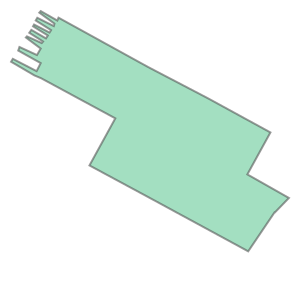

In [25]:
neighborhoods.geometry[106]

In [26]:
neighborhoods.geometry[106].contains(tsPoint)

True

In [41]:
import csv
import pyproj
import shapely.geometry as geom
proj = pyproj.Proj(init = 'epsg:2263', preserve_units=True)

counts = {}
with open('green.csv','rb') as fi:
    reader = csv.reader(fi)
    reader.next()
    #print reader.next()
    #print reader.next()
    for row in reader:
        pdt = row[0].split(' ')[1].split(':')[0] #get the hour
        if pdt != '10': # skip anything but 10:xx
            continue
        p = geom.Point(proj(float(row[3]),float(row[2])))
        match = index.intersection((p.x,p.y,p.x,p.y))
        inside = None
        for idx in match:
            if neighborhoods.geometry[idx].contains(p):
                inside = idx
                break
        if inside:
            counts[inside] = counts.get(inside,0) + 1
print len(counts)

57


In [42]:
countsPerNeighborhood = map(lambda x: (neighborhoods['NAME'][x[0]],x[1]), counts.items())

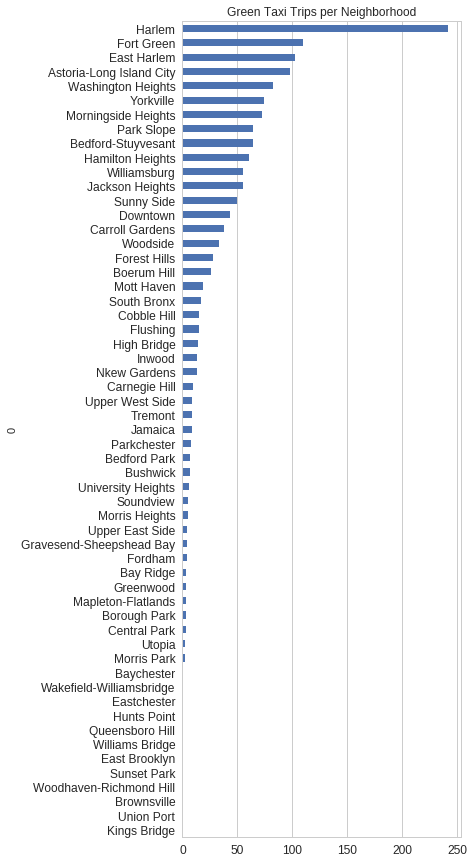

In [47]:
countsPerNeighborhood
df = pd.DataFrame(countsPerNeighborhood).sort_values(1).set_index(0)
df.plot(kind='barh', title='Green Taxi Trips per Neighborhood', figsize=(5,15), fontsize=12, legend=False)
plt.axes().yaxis.grid(False)